<a href="https://colab.research.google.com/github/shuvo8220/Sports-Data-Pipeline-EDA/blob/main/Python_Sports_Data_Pipeline%2BEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from google.colab import files
import os

In [ ]:
#  Style Settings

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

STEP 1: LOAD DATA

In [ ]:
print(" Loading dataset from 'athlete_events.csv'...")
df = pd.read_csv("/content/drive/MyDrive/athlete_events.csv")  # Make sure this file is available
print(" Dataset loaded successfully!")
print(" Shape:", df.shape)

 Loading dataset from 'athlete_events.csv'...
 Dataset loaded successfully!
 Shape: (271116, 15)


STEP 2: INITIAL EXPLORATION

In [ ]:
print("\n Column Info:")
print(df.dtypes)


 Column Info:
ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object


In [ ]:
print("\n Missing Values:")
print(df.isnull().sum())



 Missing Values:
ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64


In [ ]:
print("\n Descriptive Stats:")
print(df.describe(include='all'))


 Descriptive Stats:
                   ID                  Name     Sex            Age  \
count   271116.000000                271116  271116  261642.000000   
unique            NaN                134732       2            NaN   
top               NaN  Robert Tait McKenzie       M            NaN   
freq              NaN                    58  196594            NaN   
mean     68248.954396                   NaN     NaN      25.556898   
std      39022.286345                   NaN     NaN       6.393561   
min          1.000000                   NaN     NaN      10.000000   
25%      34643.000000                   NaN     NaN      21.000000   
50%      68205.000000                   NaN     NaN      24.000000   
75%     102097.250000                   NaN     NaN      28.000000   
max     135571.000000                   NaN     NaN      97.000000   

               Height         Weight           Team     NOC        Games  \
count   210945.000000  208241.000000         271116  271116   

 STEP 3: CLEAN & ORGANIZE

In [ ]:
#  Remove duplicates
df.drop_duplicates(inplace=True)

In [ ]:
# Drop rows missing critical info
df.dropna(subset=["Name", "Sex", "Age", "Sport", "Event", "Year"], inplace=True)

In [ ]:
#  Handle numeric missing values (Height, Weight)
df["Height"] = df["Height"].fillna(df["Height"].median())
df["Weight"] = df["Weight"].fillna(df["Weight"].median())

In [ ]:
#  Convert types
df["Age"] = df["Age"].astype(int)
df["Year"] = df["Year"].astype(int)

In [ ]:
#  Sort for readability
df.sort_values(by=["Year", "Team", "Name", "Sport"], inplace=True)

In [ ]:
#  Feature: Did athlete win a medal?
df["Medal_Won"] = df["Medal"].notnull()

In [ ]:
output_path = "olympic_cleaned.csv"
df.to_csv(output_path, index=False)
print(f" Cleaned dataset saved as '{output_path}'")

 Cleaned dataset saved as 'olympic_cleaned.csv'


In [ ]:
from google.colab import files
files.download("olympic_cleaned.csv")
print(" Cleaned dataset is ready and downloading... Enjoy exploring the Olympic insights!")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 Cleaned dataset is ready and downloading... Enjoy exploring the Olympic insights!


STEP 4: EXPLORATORY DATA ANALYSIS

/tmp/ipython-input-21-2554107617.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=medal_count.index, y=medal_count.values, palette="pastel")


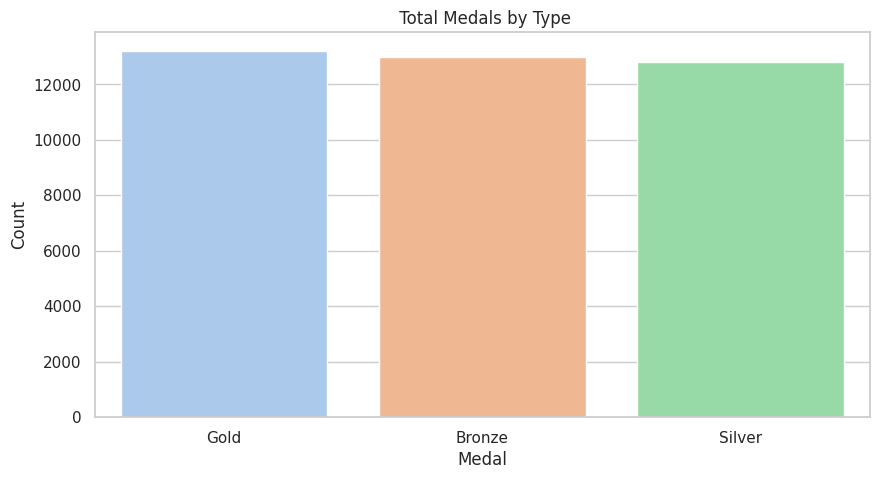

In [ ]:
# Medal Count
plt.figure()
medal_count = df["Medal"].value_counts()
sns.barplot(x=medal_count.index, y=medal_count.values, palette="pastel")
plt.title(" Total Medals by Type")
plt.ylabel("Count")
plt.show()

/tmp/ipython-input-22-3291774531.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_sports.index, x=top_sports.values, palette="viridis")


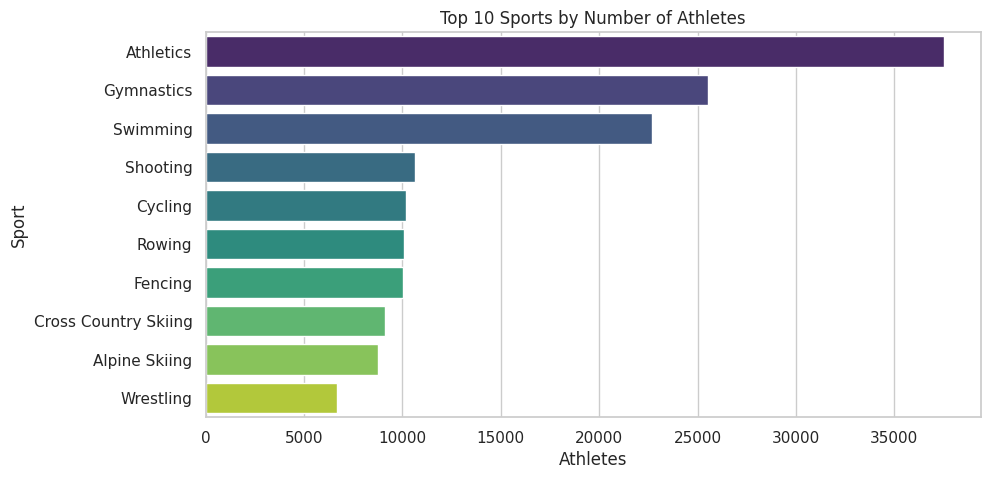

In [ ]:
#  Top 10 Sports
plt.figure()
top_sports = df["Sport"].value_counts().head(10)
sns.barplot(y=top_sports.index, x=top_sports.values, palette="viridis")
plt.title("Top 10 Sports by Number of Athletes")
plt.xlabel("Athletes")
plt.show()

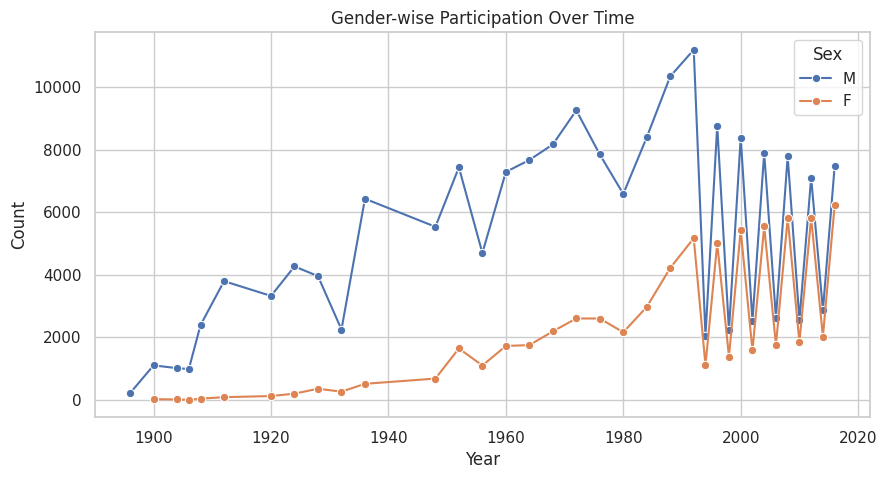

In [ ]:
#  Gender Participation Over Time
plt.figure()
gender_year = df.groupby(["Year", "Sex"]).size().reset_index(name="Count")
sns.lineplot(data=gender_year, x="Year", y="Count", hue="Sex", marker="o")
plt.title("Gender-wise Participation Over Time")
plt.show()

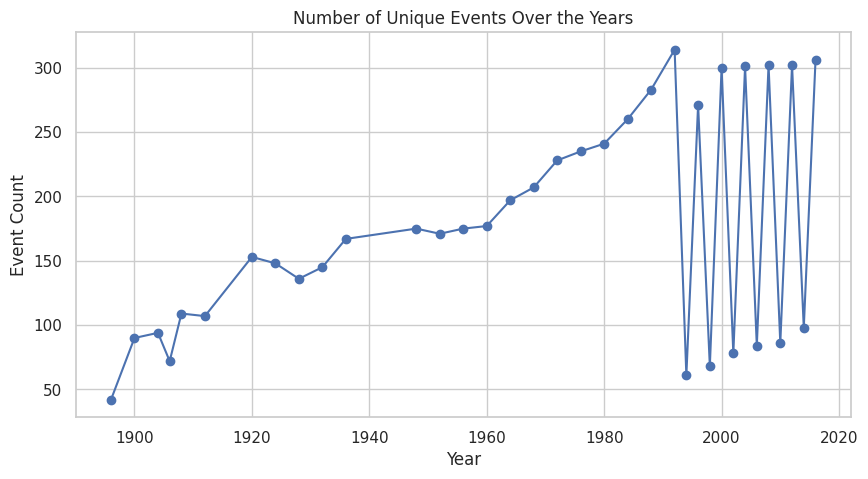

In [ ]:
#  Events Over Time
plt.figure()
events_by_year = df.groupby("Year")["Event"].nunique()
events_by_year.plot(marker='o')
plt.title("Number of Unique Events Over the Years")
plt.ylabel("Event Count")
plt.grid(True)
plt.show()

In [ ]:
#  Top Participating Countries
top_teams = df["Team"].value_counts().head(15).reset_index()
top_teams.columns = ["Country", "Athletes"]
fig = px.bar(top_teams, x="Country", y="Athletes", color="Country", title="🌐 Top 15 Countries by Participation")
fig.show()

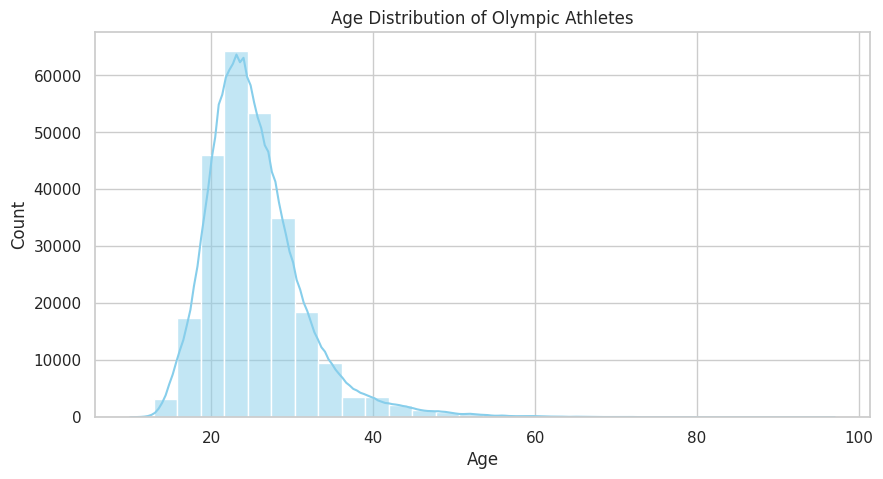

In [ ]:
# Age Distribution
plt.figure()
sns.histplot(df["Age"], kde=True, bins=30, color="skyblue")
plt.title("Age Distribution of Olympic Athletes")
plt.show()

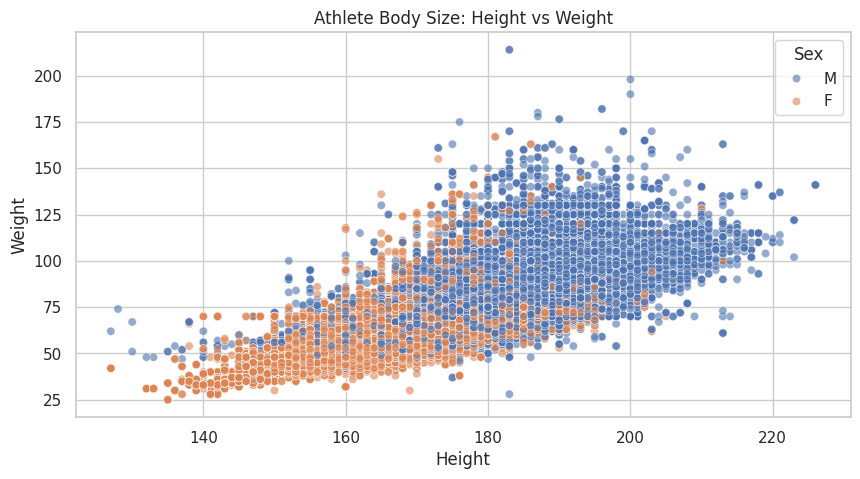

In [ ]:
#  Height vs Weight Scatter (Outlier View)
plt.figure()
sns.scatterplot(data=df, x="Height", y="Weight", hue="Sex", alpha=0.6)
plt.title("Athlete Body Size: Height vs Weight")
plt.show()

/tmp/ipython-input-28-238987297.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




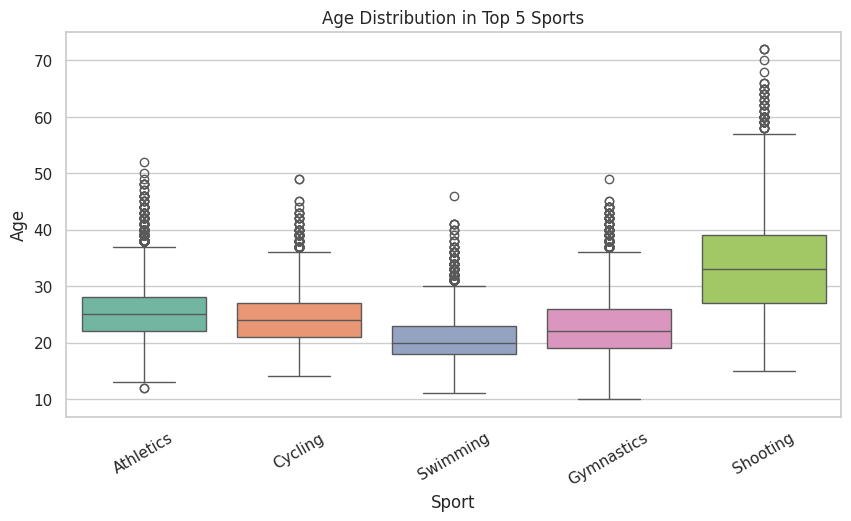

In [ ]:
#  Age by Top 5 Sports
plt.figure()
top_sport_list = df["Sport"].value_counts().head(5).index
sns.boxplot(data=df[df["Sport"].isin(top_sport_list)], x="Sport", y="Age", palette="Set2")
plt.title("Age Distribution in Top 5 Sports")
plt.xticks(rotation=30)
plt.show()

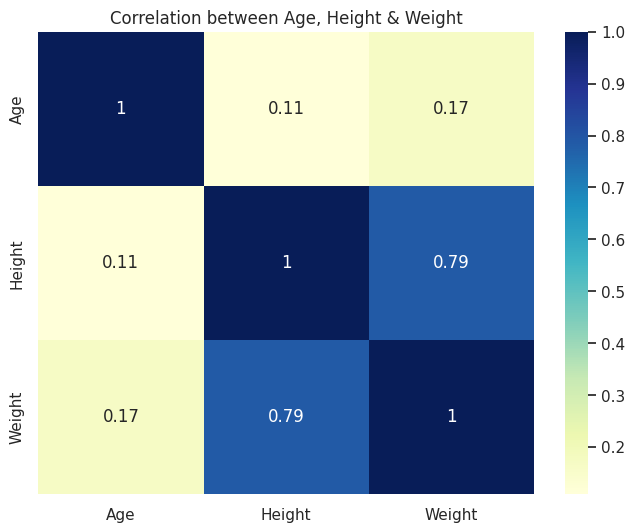

In [ ]:
#  Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[["Age", "Height", "Weight"]].corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation between Age, Height & Weight")
plt.show()

/tmp/ipython-input-30-491977165.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




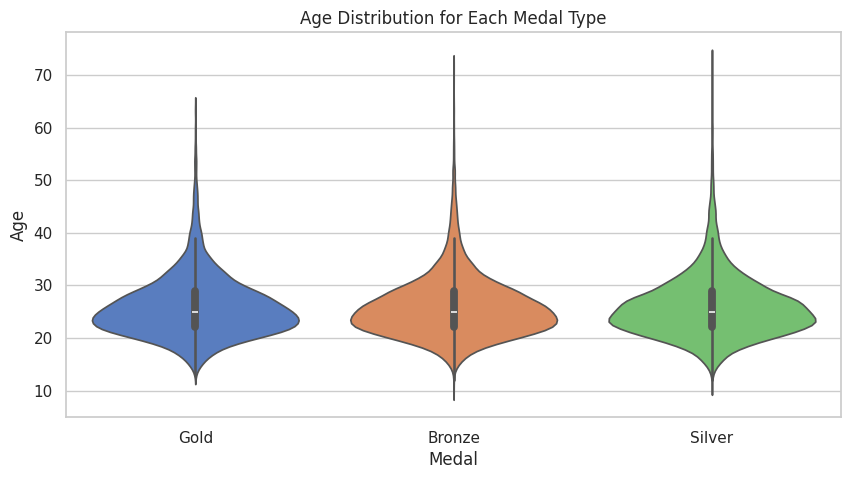

In [ ]:
#  Age by Medal Type
plt.figure()
medal_df = df[df["Medal"].notnull()]
sns.violinplot(data=medal_df, x="Medal", y="Age", palette="muted")
plt.title("Age Distribution for Each Medal Type")
plt.show()


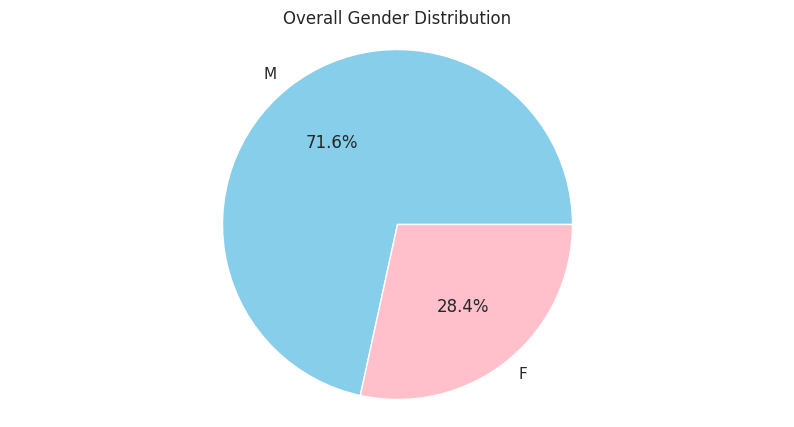

In [ ]:
#  Gender Ratio Pie Chart
plt.figure()
gender_counts = df["Sex"].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%", colors=["skyblue", "pink"])
plt.title("Overall Gender Distribution")
plt.axis('equal')
plt.show()